## Running simulations with `pyloric`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pyloric import create_prior, simulate, stats
from pyloric.utils import show_traces
import torch
import pandas as pd

In [3]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 2000)
pd.set_option('display.float_format', '{:,.4f}'.format)

### Obtain parameter sets

In [4]:
prior = create_prior()
torch.manual_seed(0)
p = prior.sample((2,))
p

AB/PD                                                      LP                                                      PY                                                  Synapses                                                      
      Na    CaT    CaS      A    KCa     Kd      H   Leak     Na    CaT    CaS      A    KCa     Kd      H   Leak     Na    CaT    CaS      A    KCa     Kd      H   Leak    AB-LP    PD-LP    AB-PY    PD-PY    LP-PD    LP-PY    PY-LP
0 0.3046 0.0033 0.0023 0.0347 0.0061 0.0778 0.0000 0.0000 0.0730 0.0005 0.0041 0.0118 0.0022 0.0488 0.0000 0.0000 0.1535 0.0016 0.0017 0.0336 0.0007 0.0739 0.0000 0.0000 -15.2981 -11.9937 -11.6565 -10.5695  -9.8392 -15.7997  -9.0965
1 0.1980 0.0009 0.0008 0.0181 0.0086 0.0606 0.0000 0.0000 0.0462 0.0004 0.0015 0.0298 0.0021 0.0423 0.0000 0.0000 0.0155 0.0078 0.0022 0.0332 0.0008 0.0433 0.0000 0.0000 -13.4211 -11.9062  -9.8873 -18.3693 -11.7017 -11.8616 -17.8648

### Simulate them and plot the traces

In [5]:
sim_outputs = [simulate(param_set, seed=0) for param_set in p.to_numpy()]

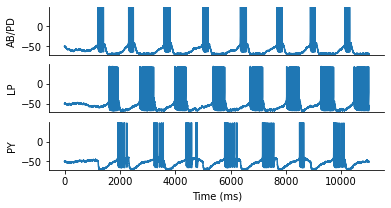

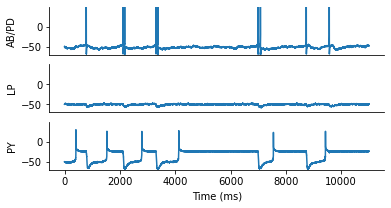

In [6]:
for sim_ in sim_outputs:
    _ = show_traces(sim_)

### Compute summary statistics

In [7]:
summstats = pd.concat([stats(sim_) for sim_ in sim_outputs], ignore_index=True)
summstats

cycle_period burst_durations                   duty_cycles               start_phases     starts_to_starts       ends_to_starts       phase_gaps      
       Circuit              PM       LP       PY          PM     LP     PY           LP  PY         AB/PD-LP LP-PY       AB/PD-LP LP-PY   AB/PD-LP LP-PY
0   1,275.5107        180.5469 433.2531 279.2781      0.1415 0.3397 0.2190          nan nan              nan   nan            nan   nan        nan   nan
1   2,439.0125         70.8833      nan      nan      0.0291    nan    nan          nan nan              nan   nan            nan   nan        nan   nan